In [1]:
!pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\tahir\anaconda3\lib\site-packages (1.0.2)


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import pickle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
import re
import string
import random
from sklearn.model_selection import train_test_split
from collections import Counter
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import top_k_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import mean_squared_error

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#@title Record Each Cell's Execution Time
!pip install ipython-autotime

%load_ext autotime

time: 0 ns (started: 2022-05-14 12:43:22 +08:00)


In [4]:
data = pd.read_csv('Labbeled-Dataset_GPT.csv', encoding='latin1', engine='python',usecols=['Base_Reviews','category'])
data = data[pd.notnull(data['category'])]
print(data.head())
print(data['Base_Reviews'].astype(str).apply(lambda x: len(x.split(' '))).sum())

                                        Base_Reviews    category
0  Downloaded this on a Kindle Fire 8 HD.  No ind...    decision
1  It's free to download the app, but if you want...    decision
2  I download this app to my Kindle Fire HD. I tr...       issue
3  Dirty trickster! It found my printer and print...       issue
4                Love this for my kindle print needs  supporting
195360
time: 63 ms (started: 2022-05-14 12:43:22 +08:00)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11419 entries, 0 to 11418
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Base_Reviews  11419 non-null  object
 1   category      11419 non-null  object
dtypes: object(2)
memory usage: 267.6+ KB
time: 32 ms (started: 2022-05-14 12:43:24 +08:00)


In [6]:
data.head(5)

,Base_Reviews,category
0,Downloaded this on a Kindle Fire 8 HD. No ind...,decision
1,"It's free to download the app, but if you want...",decision
2,I download this app to my Kindle Fire HD. I tr...,issue
3,Dirty trickster! It found my printer and print...,issue
4,Love this for my kindle print needs,supporting


time: 16 ms (started: 2022-05-14 12:43:24 +08:00)


In [7]:
data.category.value_counts()

supporting    5117
attacking     2949
issue         2191
neutral        659
decision       503
Name: category, dtype: int64

time: 0 ns (started: 2022-05-14 12:43:25 +08:00)


In [8]:
data.describe()

,Base_Reviews,category
count,11419,11419
unique,9875,5
top,Good,supporting
freq,52,5117


time: 15 ms (started: 2022-05-14 12:43:25 +08:00)


In [9]:
data.Base_Reviews.duplicated(keep="first").value_counts()

False    9875
True     1544
Name: Base_Reviews, dtype: int64

time: 0 ns (started: 2022-05-14 12:43:26 +08:00)


In [10]:
data.drop_duplicates(subset="Base_Reviews",keep="first",inplace=True,ignore_index=True)
data.describe()

,Base_Reviews,category
count,9875,9875
unique,9875,5
top,Downloaded this on a Kindle Fire 8 HD. No ind...,supporting
freq,1,4712


time: 16 ms (started: 2022-05-14 12:43:26 +08:00)


In [11]:
data.category.value_counts()

supporting    4712
attacking     2363
issue         2004
decision       444
neutral        352
Name: category, dtype: int64

time: 0 ns (started: 2022-05-14 12:43:27 +08:00)


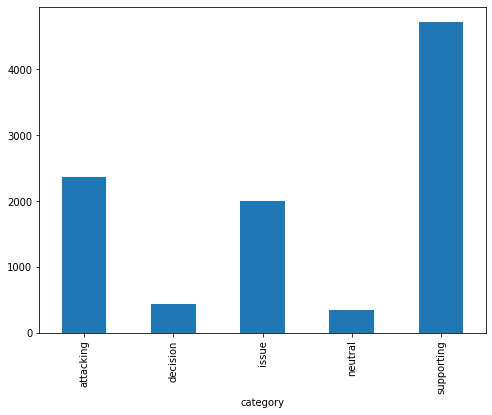

time: 593 ms (started: 2022-05-14 12:43:35 +08:00)


In [12]:
fig = plt.figure(figsize=(8,6))
data.groupby('category').Base_Reviews.count().plot.bar(ylim=0)
plt.show()

In [13]:
data['words'] = [len(x.split()) for x in data['Base_Reviews'].tolist()]

time: 16 ms (started: 2022-05-14 12:43:35 +08:00)


In [14]:
data['words'].describe()

count    9875.000000
mean       18.731646
std        22.151459
min         1.000000
25%         6.000000
50%        12.000000
75%        24.000000
max       375.000000
Name: words, dtype: float64

time: 16 ms (started: 2022-05-14 12:43:36 +08:00)


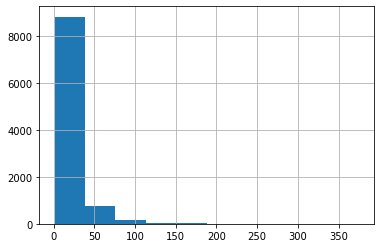

time: 141 ms (started: 2022-05-14 12:43:37 +08:00)


In [15]:
# Distribution of words in each review
data.Base_Reviews.str.split().\
    map(lambda x: len(x)).\
    hist()

In [16]:
print(max(data['Base_Reviews'], key=len))

CAPITALIZATION in this review is NOT screaming ... just highlighting ...My initial "review to myself" was positive, when I tested a plain, short "Word" style document. It seemed to work just fine, and NOBODY releases software that doesn't work do they? snort!!! So I bought the program, and BOY! am I SORRY! that I did so, because I can now no longer get a refund as I have struggled SO long and SO hard, trying to make this piece of software do the simplest tasks.There is SO much of this app that either just plain does not work, or has VERY limited functionality, or does not work quite right, that I CANNOT in good conscience recommend this app to ANYONE for ANY reason.I have written to Support twice, and beyond the "We have received your request..." email notice, I have received NO response whatsoever to my request for assistance or clarification.The so called HELP system is more a list of what the menu options are than they are instructions on how to use this app. As a help system, it is

In [17]:
print(min(data['Base_Reviews'], key=len))

Ok
time: 15 ms (started: 2022-05-14 12:43:38 +08:00)


In [18]:
data["Base_Reviews"]

0       Downloaded this on a Kindle Fire 8 HD.  No ind...
1       It's free to download the app, but if you want...
2       I download this app to my Kindle Fire HD. I tr...
3       Dirty trickster! It found my printer and print...
4                     Love this for my kindle print needs
                              ...                        
9870                       Not convinced but a bit of fun
9871                                                Faker
9872                                 It's actually good(:
9873                              Never ordered this item
9874                         Load of rubbish, deleted app
Name: Base_Reviews, Length: 9875, dtype: object

time: 0 ns (started: 2022-05-14 12:43:39 +08:00)


In [19]:
data["category"]

0         decision
1         decision
2            issue
3            issue
4       supporting
           ...    
9870       neutral
9871     attacking
9872       neutral
9873      decision
9874      decision
Name: category, Length: 9875, dtype: object

time: 0 ns (started: 2022-05-14 12:43:39 +08:00)


In [20]:
data["category"] = data["category"].astype('category') #By converting an existing Series or column to a category dtype
data.dtypes

Base_Reviews      object
category        category
words              int64
dtype: object

time: 0 ns (started: 2022-05-14 12:43:40 +08:00)


In [21]:
data["category_id"] = data["category"].cat.codes
data.tail()

,Base_Reviews,category,words,category_id
9870,Not convinced but a bit of fun,neutral,7,3
9871,Faker,attacking,1,0
9872,It's actually good(:,neutral,3,3
9873,Never ordered this item,decision,4,1
9874,"Load of rubbish, deleted app",decision,5,1


time: 0 ns (started: 2022-05-14 12:43:41 +08:00)


In [22]:
data.dtypes

Base_Reviews      object
category        category
words              int64
category_id         int8
dtype: object

time: 0 ns (started: 2022-05-14 12:43:42 +08:00)


In [23]:
id_to_category = pd.Series(data.category.values,index=data.category_id).to_dict()
id_to_category

{1: 'decision', 2: 'issue', 4: 'supporting', 0: 'attacking', 3: 'neutral'}

time: 156 ms (started: 2022-05-14 12:43:42 +08:00)


In [24]:
category_to_id= {v:k for k,v in id_to_category.items()}
category_to_id

{'decision': 1, 'issue': 2, 'supporting': 4, 'attacking': 0, 'neutral': 3}

time: 0 ns (started: 2022-05-14 12:43:44 +08:00)


In [25]:
number_of_categories = len(category_to_id)
number_of_categories

5

time: 0 ns (started: 2022-05-14 12:43:44 +08:00)


In [26]:
wordList = list()
for i in range(len(data)):
    temp = data.Base_Reviews[i].split()
    for k in temp:
        k = re.sub("[^a-zA-ZğĞüÜşŞıİöÖçÇ]","",k)
        if k != "":
            wordList.append(k)

time: 250 ms (started: 2022-05-14 12:43:45 +08:00)


In [27]:
wordCount = Counter(wordList)
countedWordDict = dict(wordCount)
sortedWordDict = sorted(countedWordDict.items(),key = lambda x : x[1],reverse=True)

print("Most Used 20 Words")
for word,counted in sortedWordDict[0:20]:
    print("{} : {}".format(word,counted))

Most Used 20 Words
to : 7201
I : 6259
the : 5249
it : 4922
and : 4552
a : 3462
app : 3242
my : 3117
is : 2413
for : 2350
this : 2212
not : 2008
on : 1783
of : 1700
with : 1588
you : 1559
have : 1485
but : 1422
work : 1373
that : 1322
time: 31 ms (started: 2022-05-14 12:43:46 +08:00)


In [28]:
for i in data["Base_Reviews"][7:10]:
    if "oku" in i:
        print(i)
        print("*"*20)

time: 0 ns (started: 2022-05-14 12:43:47 +08:00)


In [29]:
!pip install wordcloud

time: 3 s (started: 2022-05-14 12:44:03 +08:00)


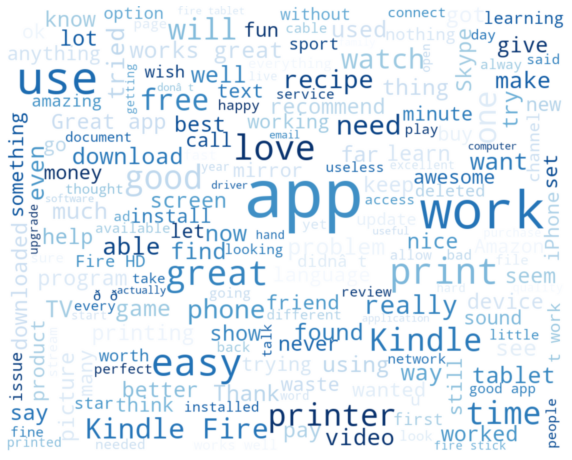

time: 2.78 s (started: 2022-05-14 12:44:08 +08:00)


In [30]:
# Let us take a look at the most frequently used word in the reviews
from wordcloud import WordCloud
word_cloud = WordCloud(width = 1000,
                       height = 800,
                       colormap = 'Blues', 
                       margin = 0,
                       max_words = 183,  
                       max_font_size = 120, min_font_size = 15,  
                       background_color = "white").generate(" ".join(data['Base_Reviews']))

plt.figure(figsize = (10, 15))
plt.imshow(word_cloud, interpolation = "gaussian")
plt.axis("off")
plt.savefig("GPT Cloud-word-freq mode.png", dpi=250)

In [31]:
df2 = data.sample(1000, random_state=1).copy()

time: 15 ms (started: 2022-05-14 12:44:18 +08:00)


In [32]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1,1))

# We transform each review into a vector
df2_features = tfidf.fit_transform(df2.Base_Reviews).toarray()

df2_labels = df2.category_id

print("Each of the %d reviews is represented by %d features (TF-IDF score of unigrams and bigrams)" %(df2_features.shape))

Each of the 1000 reviews is represented by 497 features (TF-IDF score of unigrams and bigrams)
time: 31 ms (started: 2022-05-14 12:44:18 +08:00)


In [33]:
df2_features.shape

(1000, 497)

time: 0 ns (started: 2022-05-14 12:44:19 +08:00)


In [34]:
# Finding the three most correlated terms with each of the categories
N = 20
for category, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(df2_features, df2_labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("\n==> %s:" %(category))
  print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
  print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))


==> attacking:
  * Most Correlated Unigrams are: and, charge, couldnâ, not, buy, garbage, money, kindle, work, love, get, expensive, works, good, useless, dont, sucks, doesnâ, great, pay
  * Most Correlated Bigrams are: 

==> decision:
  * Most Correlated Unigrams are: else, wasn, after, been, quickly, doesn, cannot, small, ran, stop, order, dog, reason, donâ, needed, going, didn, removed, uninstalled, deleted
  * Most Correlated Bigrams are: 

==> issue:
  * Most Correlated Unigrams are: game, love, tv, awful, unable, hand, easy, error, audio, great, doesn, live, on, ads, support, compatible, work, not, picture, sound
  * Most Correlated Bigrams are: 

==> neutral:
  * Most Correlated Unigrams are: crashes, bad, hard, program, product, my, and, guess, minutes, the, playing, it, file, fine, nice, like, works, good, okay, ok
  * Most Correlated Bigrams are: 

==> supporting:
  * Most Correlated Unigrams are: informative, problems, recipes, tool, learn, useless, amazing, pay, get, learn

In [35]:
#limit the number of samples to be used in code runs
data_size= 9870

time: 0 ns (started: 2022-05-14 12:44:19 +08:00)


In [36]:
vocab_size = 2000  # Only consider the top 90k words
maxlen = 50  # Max sequence size                           # orignale 50 

time: 0 ns (started: 2022-05-14 12:44:20 +08:00)


In [37]:
# save features and targets from the 'data' (raw data)
features, targets = data['Base_Reviews'], data['category_id']

time: 0 ns (started: 2022-05-14 12:44:21 +08:00)


In [38]:
train_features, test_features, train_targets, test_targets = train_test_split(
        features, targets,
        train_size=0.8,
        test_size=0.2,
        # random but same for all run, also accurancy depends on the
        # selection of data e.g. if we put 10 then accuracy will be 1.0
        # in this example
        random_state=23,
        # keep same proportion of 'target' in test and target data
        stratify=targets
    )

time: 16 ms (started: 2022-05-14 12:44:21 +08:00)


In [39]:
def custom_standardization(input_string): 
    first_input = tf.strings.regex_replace(input_string, "İ", "I")
    lowercased = tf.strings.lower(first_input, encoding='utf-8') #Turn to lower case
    stripped_html = tf.strings.regex_replace(lowercased, "<br />", " ") #Remove html line-break tags
    no_numbers = tf.strings.regex_replace(stripped_html, "\w*\d\w*"," ") #Remove numbers
    no_punctuation = tf.strings.regex_replace(no_numbers,'[%s]' % re.escape(string.punctuation),'') #Remove punctuations
    no_turkish_character = tf.strings.regex_replace(no_punctuation, "ç", "c") #Replace turkish characters
    no_turkish_character = tf.strings.regex_replace(no_turkish_character, "ğ", "g")
    no_turkish_character = tf.strings.regex_replace(no_turkish_character, "ı", "i")
    no_turkish_character = tf.strings.regex_replace(no_turkish_character, "ö", "o")
    no_turkish_character = tf.strings.regex_replace(no_turkish_character, "ş", "s")
    no_turkish_character = tf.strings.regex_replace(no_turkish_character, "ü", "u")
    no_read_more = tf.strings.regex_replace(no_turkish_character, "...devamini oku", " ") #Remove "Read More"
    return no_read_more

time: 0 ns (started: 2022-05-14 12:44:23 +08:00)


In [40]:
# Create a vectorization layer and adapt it to the text
vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=vocab_size - 1,
    output_mode="int",
    output_sequence_length=maxlen,
)

time: 63 ms (started: 2022-05-14 12:44:24 +08:00)


In [41]:
vectorize_layer.adapt(train_features)
vocab = vectorize_layer.get_vocabulary() 

time: 422 ms (started: 2022-05-14 12:44:24 +08:00)


In [42]:
print("vocab has the ", len(vocab)," entries")
print("vocab has the following first 10 entries")
for word in range(10):
  print(word, " represents the word: ", vocab[word])

vocab has the  1999  entries
vocab has the following first 10 entries
0  represents the word:  
1  represents the word:  [UNK]
2  represents the word:  to
3  represents the word:  i
4  represents the word:  it
5  represents the word:  the
6  represents the word:  and
7  represents the word:  a
8  represents the word:  app
9  represents the word:  my
time: 0 ns (started: 2022-05-14 12:44:25 +08:00)


In [43]:
# Vector for word "user Comment"
print(vectorize_layer("This application is just great. Helps to mirror every device screen on the fire tv."))

tf.Tensor(
[ 10 315  12  40  23 388   2 197 137 181 103  14   5  35  66   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0], shape=(50,), dtype=int64)
time: 32 ms (started: 2022-05-14 12:44:25 +08:00)


In [44]:
# Vector for word "User comment"
print(vectorize_layer("Nothing dog about it. It's like a spa video"))

tf.Tensor(
[189 683 116   4  30  38   7   1 124   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0], shape=(50,), dtype=int64)
time: 16 ms (started: 2022-05-14 12:44:26 +08:00)


In [45]:
# Pickle the config and weights
pickle.dump({'config': vectorize_layer.get_config(),
             'weights': vectorize_layer.get_weights()}
            , open("tv_layer.pkl", "wb"))

# Later you can unpickle and use 
# `config` to create object and 
# `weights` to load the trained weights. 

time: 16 ms (started: 2022-05-14 12:44:26 +08:00)


In [46]:
from_disk = pickle.load(open("tv_layer.pkl", "rb"))
new_vectorize_layer = TextVectorization.from_config(from_disk['config'])
# You have to call `adapt` with some dummy data (BUG in Keras)
new_vectorize_layer.adapt(tf.data.Dataset.from_tensor_slices(["xyz"]))
new_vectorize_layer.set_weights(from_disk['weights'])

time: 109 ms (started: 2022-05-14 12:44:27 +08:00)


In [47]:
# Vector for word "Comment"
print(new_vectorize_layer("This application is just great."))

tf.Tensor(
[ 10 315  12  40  23   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0], shape=(50,), dtype=int64)
time: 0 ns (started: 2022-05-14 12:44:27 +08:00)


In [48]:
# Vector for word "comment"
print(new_vectorize_layer("Nothing dog about it. It's like a spa video"))

tf.Tensor(
[189 683 116   4  30  38   7   1 124   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0], shape=(50,), dtype=int64)
time: 0 ns (started: 2022-05-14 12:44:28 +08:00)


In [49]:
# Vector for word "commnet"
print(new_vectorize_layer("Did not work and wasted my time"))

tf.Tensor(
[ 69  11  20   6 904   9  48   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0], shape=(50,), dtype=int64)
time: 16 ms (started: 2022-05-14 12:44:29 +08:00)


In [50]:
def causal_attention_mask(batch_size, n_dest, n_src, dtype):
    """
    Mask the upper half of the dot product matrix in self attention.
    This prevents flow of information from future tokens to current token.
    1's in the lower triangle, counting from the lower right corner.
    """
    i = tf.range(n_dest)[:, None]
    j = tf.range(n_src)
    m = i >= j - n_src + n_dest
    mask = tf.cast(m, dtype)
    mask = tf.reshape(mask, [1, n_dest, n_src])
    mult = tf.concat(
        [tf.expand_dims(batch_size, -1), tf.constant([1, 1], dtype=tf.int32)], 0
    )
    return tf.tile(mask, mult)


class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1, **kwargs):
        super(TransformerBlock, self).__init__()
        self.embed_dim=embed_dim
        self.num_heads = num_heads
        self.ff_dim =ff_dim
        self.att = layers.MultiHeadAttention(num_heads, embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs):
        input_shape = tf.shape(inputs)
        batch_size = input_shape[0]
        seq_len = input_shape[1]
        # for masked-self attention add the mask:
        # causal_mask = causal_attention_mask(batch_size, seq_len, seq_len, tf.bool)
        # attention_output = self.att(inputs, inputs,attention_mask=causal_mask)
        
        attention_output = self.att(inputs, inputs) 
        
        attention_output = self.dropout1(attention_output)
        out1 = self.layernorm1(inputs + attention_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)
    
    # https://newbedev.com/saving-keras-models-with-custom-layers
    def get_config(self):
        config = super(TransformerBlock, self).get_config()
        config.update({
            'att': self.att,
            'ffn': self.ffn,
            'layernorm1': self.layernorm1,
            'layernorm2':self.layernorm2,
            'dropout1':self.dropout1,
            'dropout2':self.dropout2,
            'embed_dim': self.embed_dim,
            'num_heads':self.num_heads,
            'ff_dim':self.ff_dim 

        })
        return config
        #tf.keras.models.save_model(model, 'model.h5')
        #new_model = tf.keras.models.load_model('model.h5', custom_objects={'CustomLayer': CustomLayer})

time: 0 ns (started: 2022-05-14 12:44:29 +08:00)


In [51]:
class TokenPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size,  embed_dim, **kwargs):
        super(TokenPositionEmbedding, self).__init__()
        self.maxlen = maxlen
        self.vocab_size = vocab_size
        self.embed_dim = embed_dim
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, X):
        maxlen = tf.shape(X)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        X = self.token_emb(X)
        return X + positions 
        
    # https://newbedev.com/saving-keras-models-with-custom-layers
    def get_config(self):
        config = super(TokenPositionEmbedding, self).get_config()
        config.update({
            'token_emb': self.token_emb,
            'pos_emb': self.pos_emb,
            'maxlen': self.maxlen,
            'vocab_size': self.vocab_size,
            'embed_dim': self.embed_dim
        })
        return config
        #tf.keras.models.save_model(model, 'model.h5')
        #new_model = tf.keras.models.load_model('model.h5', custom_objects={'CustomLayer': CustomLayer})
        

time: 0 ns (started: 2022-05-14 12:44:31 +08:00)


In [52]:
embed_dim = 256  # Embedding size for each token
num_heads = 1  # Number of attention heads
feed_forward_dim = 256  # Hidden layer size in feed forward network inside transformer


def create_model():
    inputs_tokens = layers.Input(shape=(maxlen,), dtype=tf.int32)
    embedding_layer = TokenPositionEmbedding(maxlen, vocab_size, embed_dim)
    x = embedding_layer(inputs_tokens)
    transformer_block1 = TransformerBlock(embed_dim, num_heads, feed_forward_dim)
    transformer_block2 = TransformerBlock(embed_dim, num_heads, feed_forward_dim)
    x = transformer_block1(x)
    x = transformer_block2(x)
    x = layers.Flatten()(x)
    outputs = layers.Dense(number_of_categories)(x)
    model = keras.Model(inputs=inputs_tokens, outputs=outputs)
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    metric_fn  = tf.keras.metrics.SparseCategoricalAccuracy()
    model.compile(optimizer="adam", loss=loss_fn, metrics=metric_fn)  
    
    return model
my_model=create_model()

time: 344 ms (started: 2022-05-14 12:44:54 +08:00)


In [53]:
my_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50)]              0         
                                                                 
 token_position_embedding (T  (None, 50, 256)          524800    
 okenPositionEmbedding)                                          
                                                                 
 transformer_block (Transfor  (None, 50, 256)          395776    
 merBlock)                                                       
                                                                 
 transformer_block_1 (Transf  (None, 50, 256)          395776    
 ormerBlock)                                                     
                                                                 
 flatten (Flatten)           (None, 12800)             0         
                                                             

In [54]:
#!pip install pydot

time: 0 ns (started: 2022-05-14 12:45:36 +08:00)


In [55]:
#!pip install graphviz 

time: 0 ns (started: 2022-05-14 12:45:37 +08:00)


In [56]:
tf.keras.utils.plot_model(my_model,show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
time: 16 ms (started: 2022-05-14 12:45:38 +08:00)


In [57]:
checkpoint_filepath = './checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False)

time: 0 ns (started: 2022-05-14 12:45:38 +08:00)


In [58]:
X,y = train_features,train_targets

balanced_accuracy_scores = []
matthews_corrcoef_scores = []
f1_scores = []
conf_matrix_list_of_arrays = []

# prepare cross validation
n=20
seed=1
k_fold = KFold(n_splits=n, random_state=seed, shuffle=True)

for train_index, test_index in k_fold.split(X,y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  X_train_dtm = vectorize_layer(X_train)
  X_test_dtm = vectorize_layer(X_test)
  history = my_model.fit(X_train_dtm, y_train, verbose=1, epochs=1, callbacks=[model_checkpoint_callback])
  y_pred_class = my_model.predict(X_test_dtm)

  y_pred_class = np.argmax(y_pred_class,axis=1)
  
  conf_matrix = confusion_matrix(y_test, y_pred_class)
  conf_matrix_list_of_arrays.append(conf_matrix)
  
  balanced_accuracy_scores.append(balanced_accuracy_score(y_test, y_pred_class))
  matthews_corrcoef_scores.append(matthews_corrcoef(y_test, y_pred_class))
  f1_scores.append(f1_score(y_test, y_pred_class, average='weighted'))

235/235 [==============================] - ETA: 0s - loss: 1.8514 - sparse_categorical_accuracy: 0.4326

INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


235/235 [==============================] - ETA: 0s - loss: 0.8411 - sparse_categorical_accuracy: 0.6994

INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


235/235 [==============================] - ETA: 0s - loss: 0.4834 - sparse_categorical_accuracy: 0.8269

INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


235/235 [==============================] - ETA: 0s - loss: 0.3029 - sparse_categorical_accuracy: 0.8951

INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


235/235 [==============================] - ETA: 0s - loss: 0.2094 - sparse_categorical_accuracy: 0.9314

INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


235/235 [==============================] - ETA: 0s - loss: 0.1685 - sparse_categorical_accuracy: 0.9415

INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


235/235 [==============================] - ETA: 0s - loss: 0.1321 - sparse_categorical_accuracy: 0.9552

INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


234/235 [============================>.] - ETA: 0s - loss: 0.1453 - sparse_categorical_accuracy: 0.9485

INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


234/235 [============================>.] - ETA: 0s - loss: 0.1516 - sparse_categorical_accuracy: 0.9466

INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


235/235 [==============================] - ETA: 0s - loss: 0.1370 - sparse_categorical_accuracy: 0.9507

INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


235/235 [==============================] - ETA: 0s - loss: 0.3300 - sparse_categorical_accuracy: 0.8887

INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


235/235 [==============================] - ETA: 0s - loss: 0.5942 - sparse_categorical_accuracy: 0.7860

INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


235/235 [==============================] - ETA: 0s - loss: 0.2855 - sparse_categorical_accuracy: 0.8986

INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


235/235 [==============================] - ETA: 0s - loss: 0.2977 - sparse_categorical_accuracy: 0.8942

INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


235/235 [==============================] - ETA: 0s - loss: 0.2214 - sparse_categorical_accuracy: 0.9181

INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


235/235 [==============================] - ETA: 0s - loss: 0.1666 - sparse_categorical_accuracy: 0.9424

INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


235/235 [==============================] - ETA: 0s - loss: 0.2687 - sparse_categorical_accuracy: 0.9054

INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


235/235 [==============================] - ETA: 0s - loss: 0.1448 - sparse_categorical_accuracy: 0.9487

INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


235/235 [==============================] - ETA: 0s - loss: 0.0989 - sparse_categorical_accuracy: 0.9626

INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


235/235 [==============================] - ETA: 0s - loss: 0.0802 - sparse_categorical_accuracy: 0.9700

INFO:tensorflow:Assets written to: .\checkpoint\assets


INFO:tensorflow:Assets written to: .\checkpoint\assets


235/235 [==============================] - 51s 216ms/step - loss: 0.0802 - sparse_categorical_accuracy: 0.9700
time: 12min 52s (started: 2022-05-14 12:45:44 +08:00)


In [59]:
mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0)
print('Mean of conf_matrix: ', mean_of_conf_matrix_arrays)

Mean of conf_matrix:  [[7.9900e+01 4.0000e-01 4.5500e+00 3.0000e+00 6.6500e+00]
 [1.4500e+00 1.4650e+01 7.5000e-01 5.0000e-02 8.5000e-01]
 [6.9000e+00 3.5000e-01 6.5900e+01 6.5000e-01 6.3500e+00]
 [1.6500e+00 5.0000e-02 3.5000e-01 9.4000e+00 2.6500e+00]
 [3.5000e+00 2.5000e-01 3.6000e+00 1.8000e+00 1.7935e+02]]
time: 0 ns (started: 2022-05-14 13:22:55 +08:00)


In [60]:
conf_mat = mean_of_conf_matrix_arrays.astype(int)

time: 0 ns (started: 2022-05-14 13:23:03 +08:00)


In [61]:
category_id_df = data[['category', 'category_id']].drop_duplicates()

time: 16 ms (started: 2022-05-14 13:23:13 +08:00)


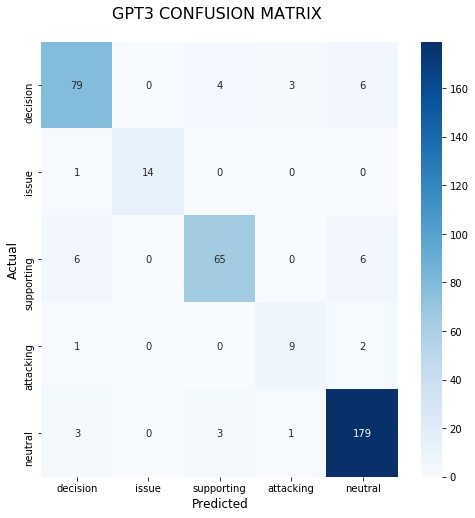

time: 625 ms (started: 2022-05-14 13:23:51 +08:00)


In [62]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=category_id_df.category.values, 
            yticklabels=category_id_df.category.values)
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.title("GPT3 CONFUSION MATRIX \n", size=16);
plt.savefig("GPT Confusion-metrix mode.png", dpi=400)

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96        99
           1       0.89      1.00      0.94        17
           2       0.97      0.99      0.98        84
           3       0.86      0.75      0.80        16
           4       0.97      0.99      0.98       179

    accuracy                           0.97       395
   macro avg       0.94      0.93      0.93       395
weighted avg       0.97      0.97      0.97       395

time: 15 ms (started: 2022-05-14 13:24:09 +08:00)


In [64]:
balanced_accuracy_scores = np.array(balanced_accuracy_scores)
print('Mean of balanced_accuracy_scores: ', np.mean(balanced_accuracy_scores, axis=0))

Mean of balanced_accuracy_scores:  0.8220036781636584
time: 0 ns (started: 2022-05-14 13:24:20 +08:00)


In [65]:
matthews_corrcoef_scores = np.array(matthews_corrcoef_scores)
print('Mean of matthews_corrcoef_scores: ', np.mean(matthews_corrcoef_scores, axis=0))

Mean of matthews_corrcoef_scores:  0.8280615774269334
time: 0 ns (started: 2022-05-14 13:24:21 +08:00)


In [66]:
f1_scores = np.array(f1_scores)
print('Mean of f1_scores: ', np.mean(f1_scores, axis=0))

Mean of f1_scores:  0.8783871609315851
time: 0 ns (started: 2022-05-14 13:24:21 +08:00)


In [67]:
f1_scores = np.array(f1_scores)
print('Mean of f1_scores: ', np.mean(f1_scores, axis=0))

Mean of f1_scores:  0.8783871609315851
time: 0 ns (started: 2022-05-14 13:24:22 +08:00)


In [68]:
test_features_vc = vectorize_layer(test_features)
y_pred_test = my_model.predict(test_features_vc)
y_pred_test = np.argmax(y_pred_test,axis=1)
 
balanced_accuracy_score_test = balanced_accuracy_score(test_targets, y_pred_test)
print('balanced_accuracy_score_test :',balanced_accuracy_score_test)
matthews_corrcoef_score_test = matthews_corrcoef(test_targets, y_pred_test)
print('matthews_corrcoef_score_test :',matthews_corrcoef_score_test)
f1_score_test = f1_score(test_targets, y_pred_test, average='weighted')
print('f1_score_test :',f1_score_test)

balanced_accuracy_score_test : 0.6313648345234879
matthews_corrcoef_score_test : 0.5777822734903286
f1_score_test : 0.7106260061018594
time: 1.91 s (started: 2022-05-14 13:24:22 +08:00)


In [69]:
new_review = "I removed it."
predictions=my_model.predict(vectorize_layer([new_review]))
for pred in predictions:
  print(id_to_category[np.argmax(pred)])

decision
time: 47 ms (started: 2022-05-14 13:24:24 +08:00)


In [70]:
examples = [
  "I removed it.",
  "Does what it says great app!",
  "Not compatable.",
  "Ok.",
  "don't waste ur time , this app won't help ur Amazon Tablet run smoother or faster.  skip it",
]
predictions=my_model.predict(vectorize_layer(examples))
for pred in predictions:
  print(id_to_category[np.argmax(pred)])

decision
supporting
attacking
neutral
issue
time: 62 ms (started: 2022-05-14 13:24:24 +08:00)


In [71]:
tf.keras.models.save_model(my_model, 'MultiClassTextClassifier')

INFO:tensorflow:Assets written to: MultiClassTextClassifier\assets


INFO:tensorflow:Assets written to: MultiClassTextClassifier\assets


time: 5.41 s (started: 2022-05-14 13:24:59 +08:00)
